In [ ]:
!pip install torch 

You should consider upgrading via the 'D:\Code\AI\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import torch # YOLOv5 implemented using pytorch
from IPython.display import Image #this is to render predictions

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5

D:\Code\AI\Scripts\yolov5


In [ ]:
!pip install -r requirements.txt

You should consider upgrading via the 'D:\Code\AI\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'D:/Code/AI/Scripts/dataset/images/train'
valPath = 'D:/Code/AI/Scripts/dataset/images/val'
crsPath = 'D:/Code/AI/Scripts/archive/ts/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [ ]:
trainimagePath = 'D:/Code/AI/Scripts/dataset/images/train'
trainlabelPath = 'D:/Code/AI/Scripts/dataset/labels/train'
valimagePath = 'D:/Code/AI/Scripts/dataset/images/val'
vallabelPath = 'D:/Code/AI/Scripts/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)
    
#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

'D:/Code/AI/Scripts/dataset/images/val\\ts'

In [ ]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-53-gf0e5a60 Python-3.9.13 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

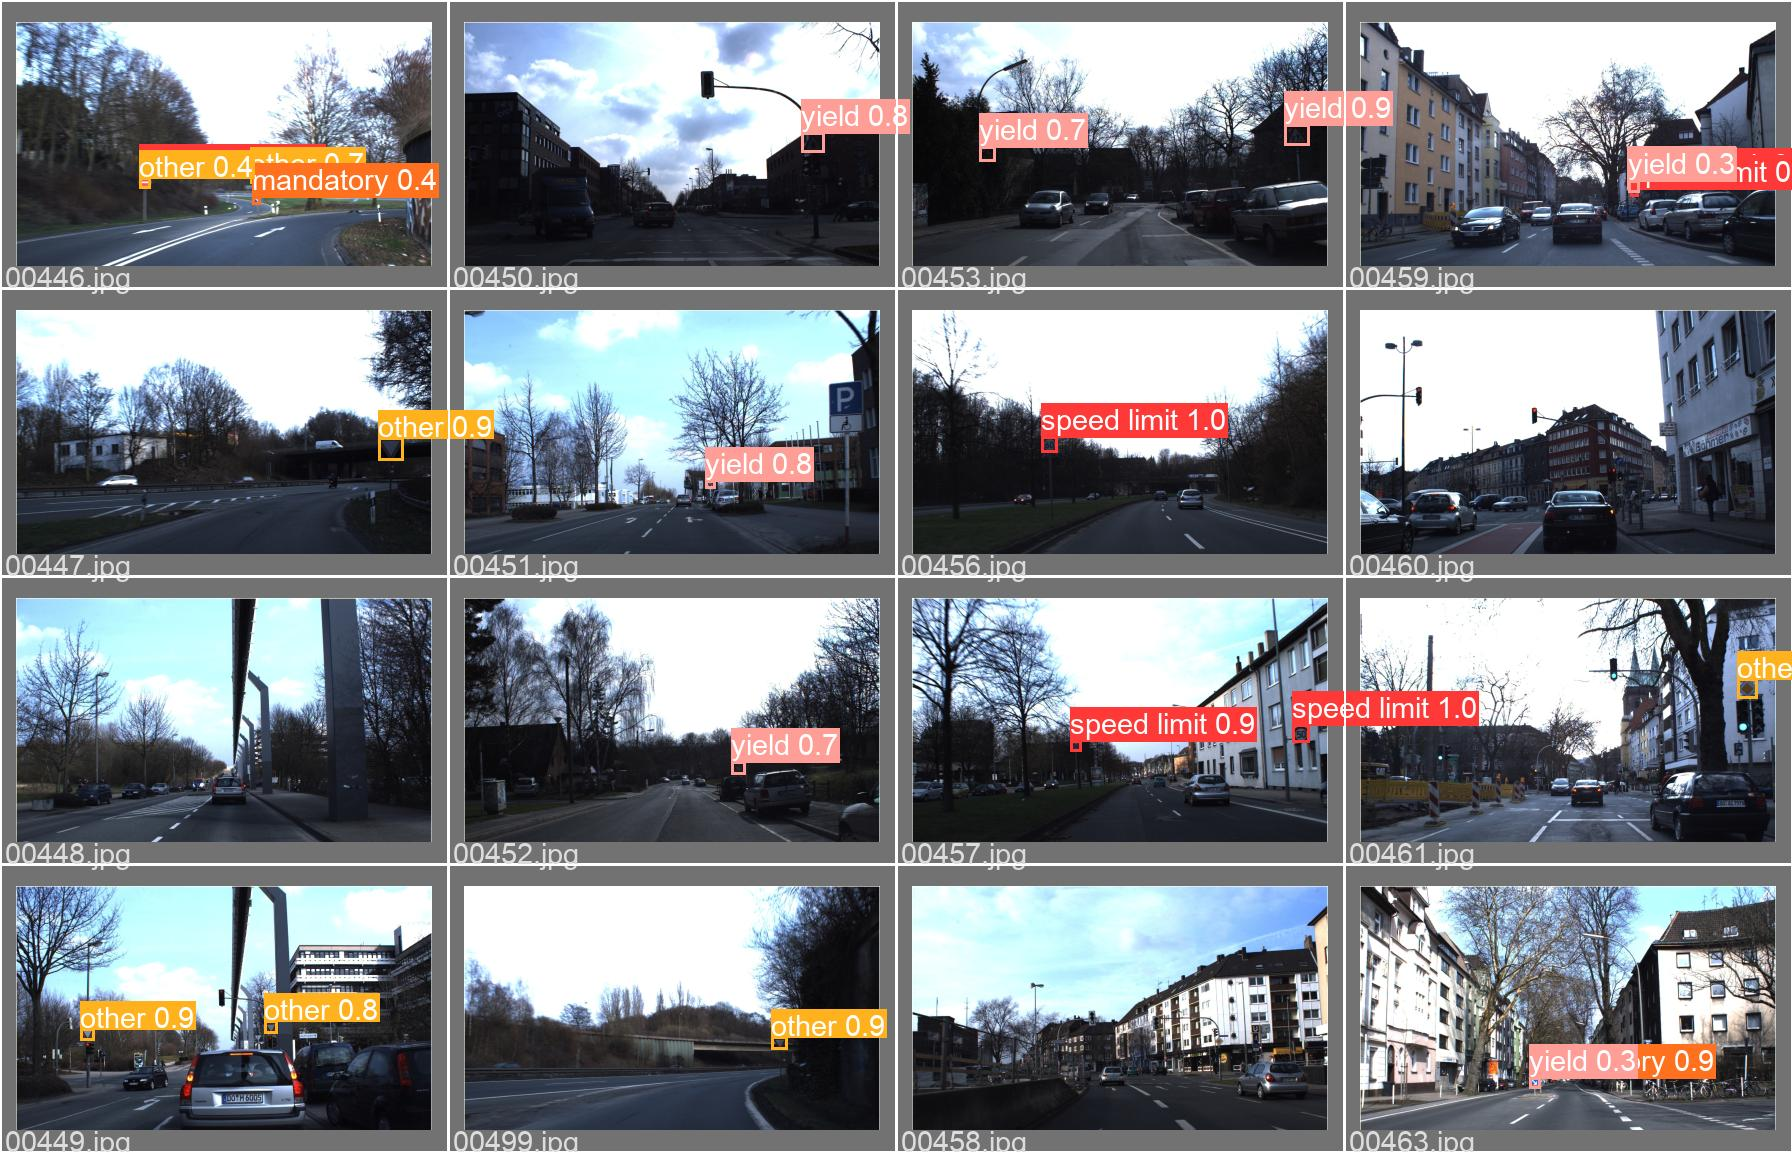

In [ ]:
Image(filename='runs/train/exp2/val_batch1_pred.jpg', width=1000)

In [ ]:
!python detect.py --source runs/train/exp2/vv.jpg --weights best.pt 

detect: weights=['best.pt'], source=runs/train/exp2/vv.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.2-53-gf0e5a60 Python-3.9.13 torch-1.12.1+cpu CPU

Traceback (most recent call last):
  File "D:\Code\AI\Scripts\yolov5\detect.py", line 254, in <module>
    main(opt)
  File "D:\Code\AI\Scripts\yolov5\detect.py", line 249, in main
    run(**vars(opt))
  File "D:\Code\AI\lib\site-packages\torch\autograd\grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "D:\Code\AI\Scripts\yolov5\detect.py", line 93, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "D:\Code\AI\